In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Aaryant31/linearRegression-Practice/main/Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Train | Validation | Test Split Procedure 

This is often also called a "hold-out" set, since you should not adjust parameters based on the final test set, but instead use it *only* for reporting final expected performance.

0. Clean and adjust data as necessary for X and y
1. Split Data in Train/Validation/Test for both X and y
2. Fit/Train Scaler on Training X Data
3. Scale X Eval Data
4. Create Model
5. Fit/Train Model on X Train Data
6. Evaluate Model on X Evaluation Data (by creating predictions and comparing to Y_eval)
7. Adjust Parameters as Necessary and repeat steps 5 and 6
8. Get final metrics on Test set (not allowed to go back and adjust after this!)

In [4]:
X=df.drop('sales',axis=1)

In [5]:
y=df.sales

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
# Remaining 30% is split into evaluation and test sets
# Each is 15% of the original data size
X_eval, X_test, y_eval, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=101)

In [9]:
len(X)

200

In [10]:
len(X_train)

140

In [11]:
len(X_test)

30

In [12]:
len(X_eval)

30

# Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()

In [16]:
scaler.fit(X_train)

StandardScaler()

In [17]:
X_train=scaler.transform(X_train)

In [18]:
X_test=scaler.transform(X_test)

In [19]:
X_eval=scaler.transform(X_eval)

##  creating model

In [20]:
from sklearn.linear_model import Ridge

In [21]:
model_one= Ridge(alpha=100)

In [22]:
model_one.fit(X_train,y_train)

Ridge(alpha=100)

In [23]:
model_one_pred=model_one.predict(X_eval)

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
mean_squared_error(y_eval,model_one_pred)

7.320101458823872

In [26]:
res1=y_eval-model_one_pred

C:\Users\Ultimatrix\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='sales'>

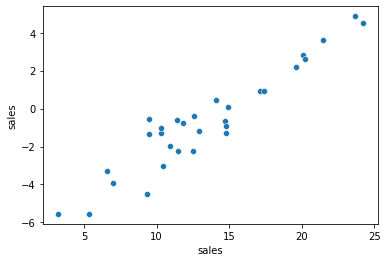

In [50]:
sns.scatterplot(y_eval,res1)

In [43]:
model_two= Ridge(alpha=1)

In [44]:
model_two.fit(X_train,y_train)

Ridge(alpha=1)

In [45]:
model_two_pred=model_two.predict(X_eval)

In [46]:
model_two_pred=model_two.predict(X_eval)

In [47]:
mean_squared_error(y_eval,model_two_pred)

2.3837830750569866

In [48]:
res2=y_eval-model_two_pred

C:\Users\Ultimatrix\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='sales'>

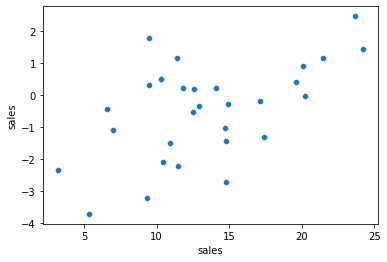

In [52]:
sns.scatterplot(y_eval,res2)

In [53]:
final_test_pred=model_two.predict(X_test)

In [54]:
mean_squared_error(y_test,final_test_pred)

2.254260083800517

In [55]:
final_res=y_test-final_test_pred

C:\Users\Ultimatrix\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='sales'>

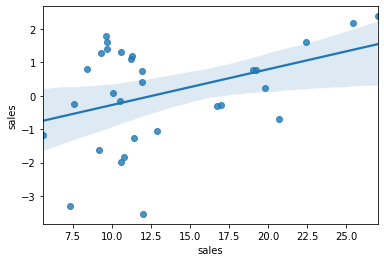

In [57]:
sns.regplot(y_test,final_res)